# Week 36 – Emma Storberg

## Exercise 1

### a)

Show that the optimal parameters are given by $$\hat{\mathbf \beta}_{Ridge} = (\mathbf X^T \mathbf X + \lambda \mathbf I )^{-1} \mathbf X^T \mathbf y $$

### b)

Show that you can write OLS solutions in terms of eigenvectors of the orthogonal matrix $\mathbf U$ as

$$ \tilde{\mathbf y}_{OLS} = \mathbf{X\beta} = \sum_{j=0}^{p-1} \mathbf u_j \mathbf u_j^T \mathbf y$$

Show that the corresponding equation for Ridge regression is

$$\tilde{\mathbf y}_{Ridge} = \mathbf{X\beta}_{Ridge} = \mathbf{U\Sigma V}^T (\mathbf{V \Sigma V}^T + \lambda \mathbf I)^{-1}(\mathbf{U \Sigma V}^T)^T\mathbf y = \sum_{j=0}^{p-1} \mathbf u_j \mathbf u_j^T \frac{\sigma _j^2}{\sigma _j^2 + \lambda} \mathbf y$$

Give an interpretation of the results.

## Exercise 2

In [22]:
# Importing various packages
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(30)
n = 100

# Making data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

# Helper arrays
poly_list = [5, 10, 15]
lmbda_list = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [23]:
def make_model(X_train, X_test, y_train, y_test, lmbda, degree=5):
    beta_hat = np.linalg.inv(X_train.T @ X_train + lmbda*np.identity(degree)) @ X_train.T @ y_train

    y_tilde_train = X_train @ beta_hat + np.mean(y_train)
    y_tilde_test = X_test @ beta_hat + np.mean(y_train)

    # MSE of training data
    MSE_train = mean_squared_error(y_train, y_tilde_train)

    # MSE of testing data
    MSE_test = mean_squared_error(y_test, y_tilde_test)

    return MSE_train, MSE_test

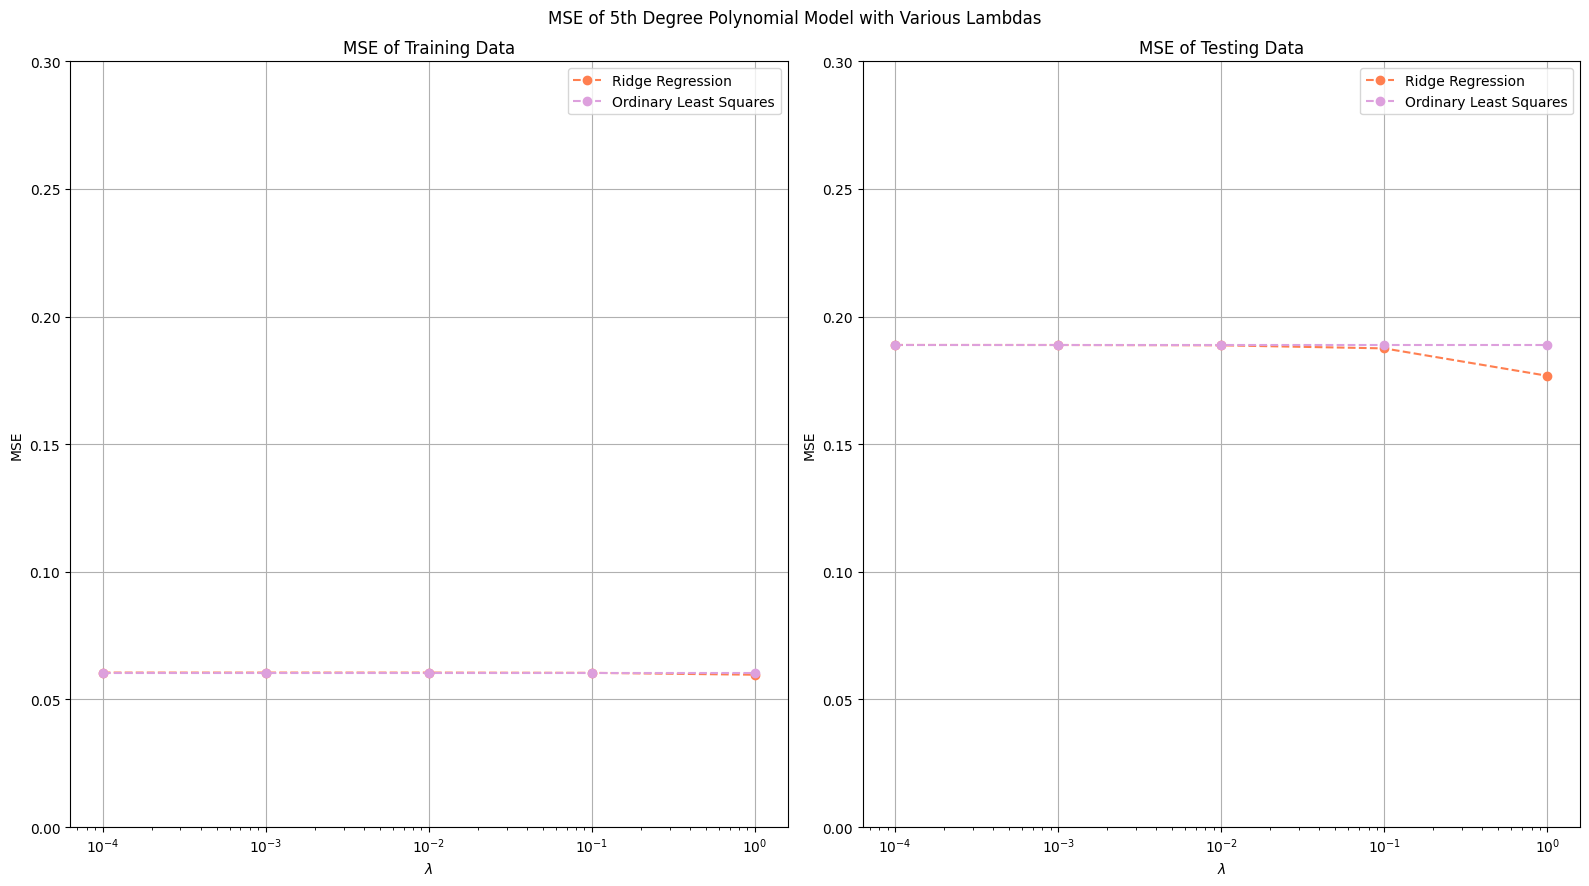

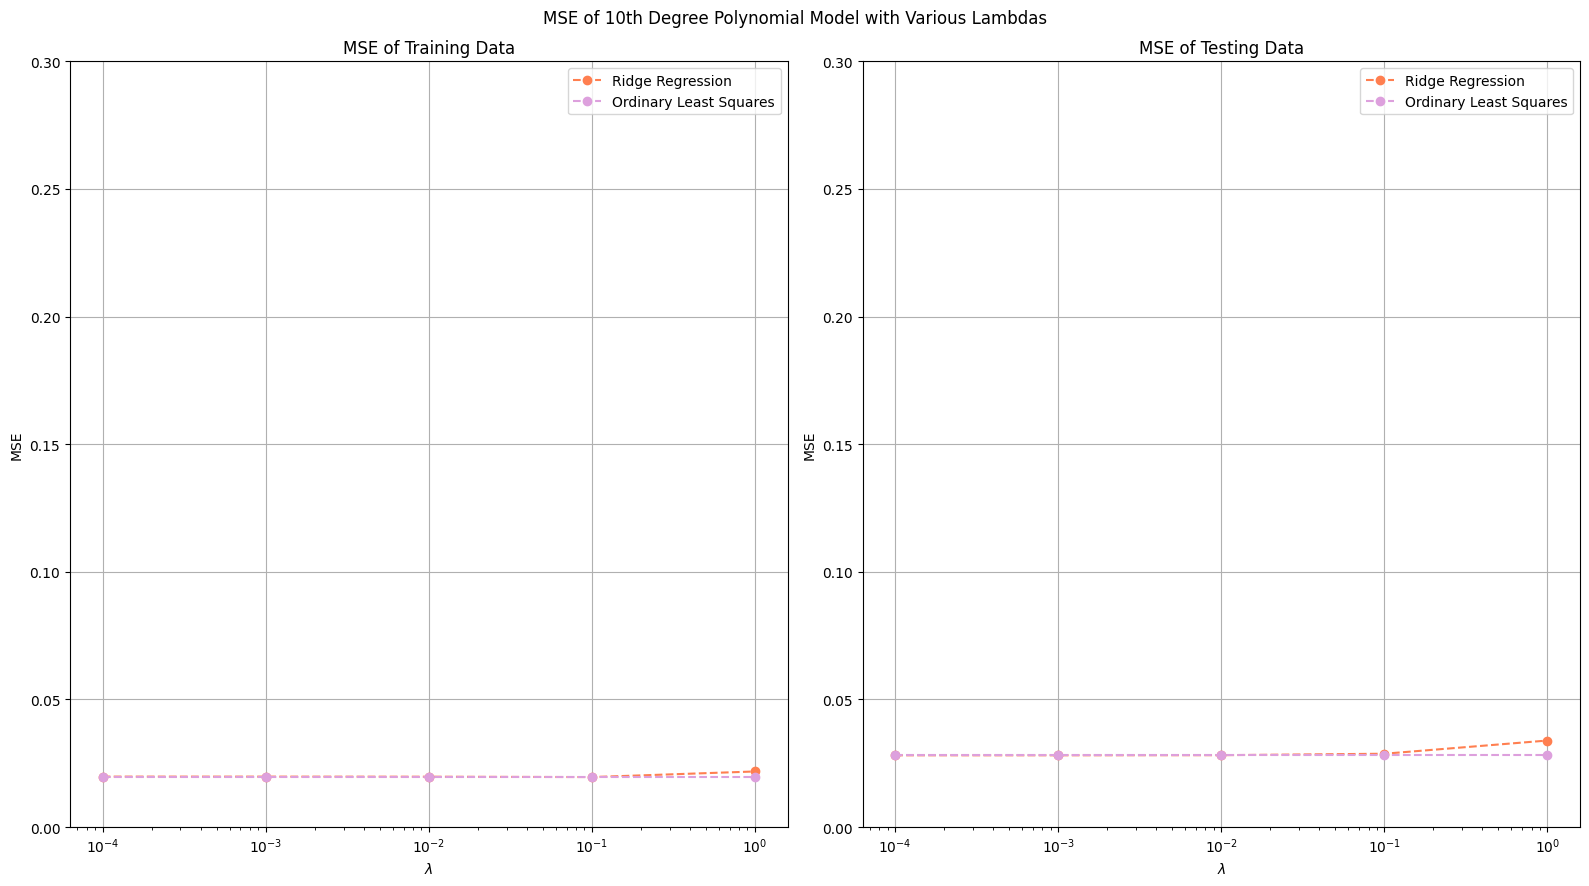

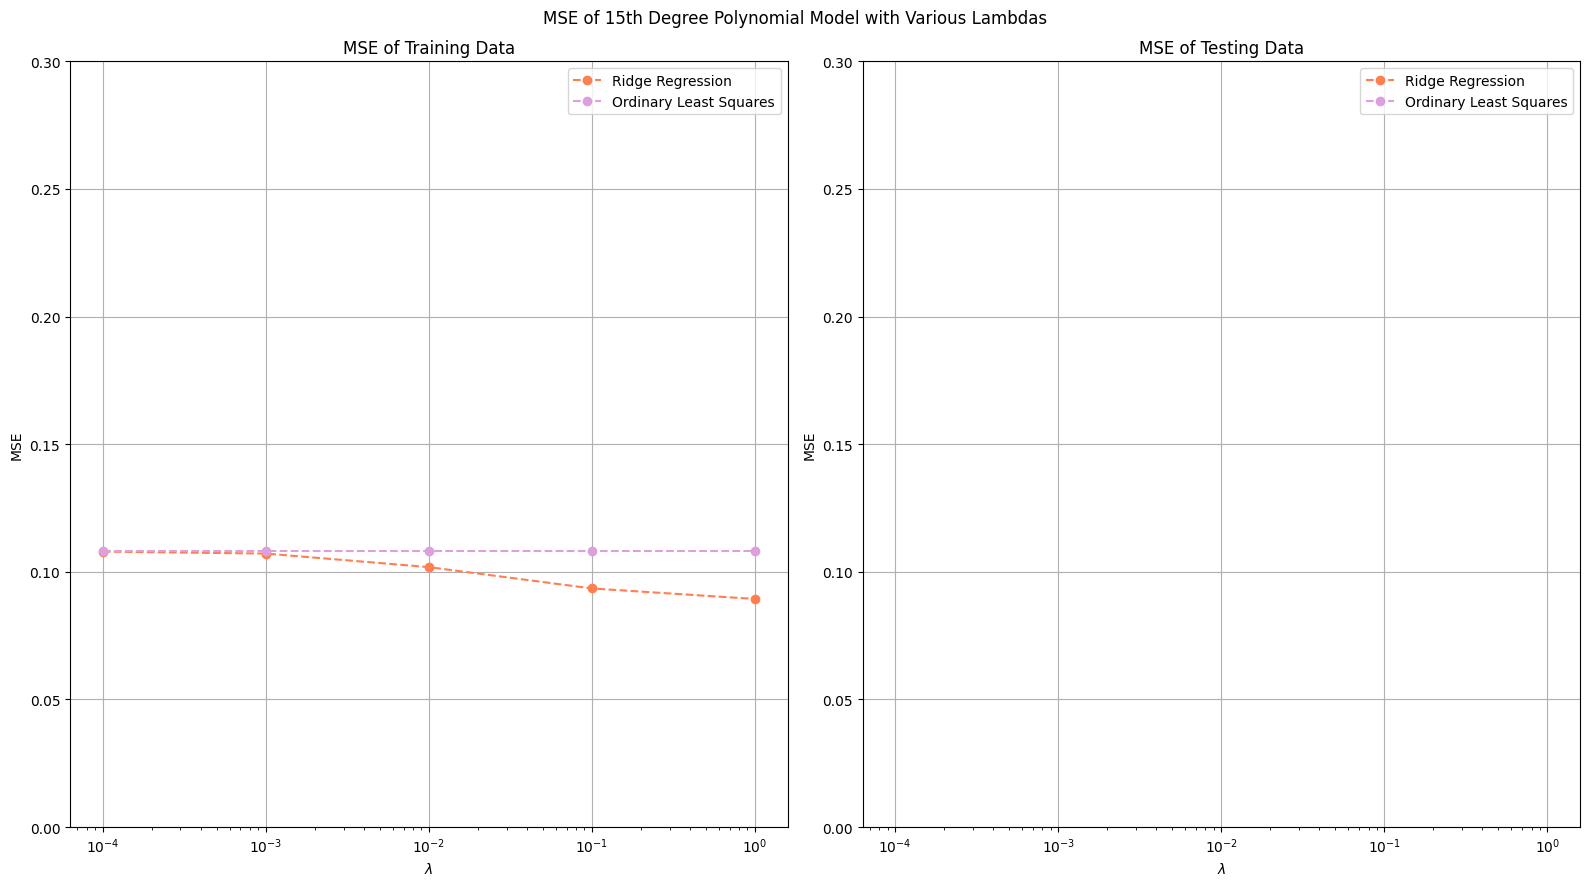

In [24]:
for degree in poly_list:
    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    train_error_ridge = []
    test_error_ridge = []

    train_error_ols = []
    test_error_ols = []

    # Gathering data from make_model function in arrays
    MSE_train_ols, MSE_test_ols = make_model(X_train, X_test, y_train, y_test, lmbda=0, degree=degree)

    for lmbda in lmbda_list:
        MSE_train_ridge, MSE_test_ridge = make_model(X_train, X_test, y_train, y_test, lmbda, degree=degree)
        train_error_ridge.append(MSE_train_ridge)
        test_error_ridge.append(MSE_test_ridge)

        train_error_ols.append(MSE_train_ols)
        test_error_ols.append(MSE_test_ols)


    # Plotting
    """
    plt.plot(lmbda_list, train_error_ridge, label="Ridge Regression Train", color="coral", linestyle="--", marker="o")
    plt.plot(lmbda_list, train_error_ols, label="Ordinary Least Squares Train", color="plum", linestyle="--", marker="o")
    plt.plot(lmbda_list, test_error_ridge, label="Ridge Regression Test", color="coral", marker="o")
    plt.plot(lmbda_list, test_error_ols, label="Ordinary Least Squares Test", color="plum", marker="o")
    plt.xlabel((r"$\lambda$"))
    plt.xscale("log")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(f"MSE of {degree}th Degree Polynomial Model with Various Lambdas")
    plt.show()

    """
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))

    axs[0].plot(lmbda_list, train_error_ridge, label="Ridge Regression", color="coral", linestyle="--", marker="o")
    axs[0].plot(lmbda_list, train_error_ols, label="Ordinary Least Squares", color="plum", linestyle="--", marker="o")
    axs[0].set_title("MSE of Training Data")
    axs[0].set_xlabel(r"$\lambda$")
    axs[0].set_xscale("log")
    axs[0].set_ylabel("MSE")
    axs[0].set_ylim(0.00, 0.3)
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(lmbda_list, test_error_ridge, label="Ridge Regression", color="coral", linestyle="--", marker="o")
    axs[1].plot(lmbda_list, test_error_ols, label="Ordinary Least Squares", color="plum", linestyle="--", marker="o")
    axs[1].set_title("MSE of Testing Data")
    axs[1].set_xlabel(r"$\lambda$")
    axs[1].set_xscale("log")
    axs[1].set_ylabel("MSE")
    axs[1].set_ylim(0.0, 0.3)
    axs[1].legend()
    axs[1].grid(True)

    fig.suptitle(f"MSE of {degree}th Degree Polynomial Model with Various Lambdas")
    plt.tight_layout()
    plt.show()